<a href="https://colab.research.google.com/github/edojatheophilus/AI-vs-Human-Text-Detection/blob/Development/AI_human_txt_NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Don't run below code. maximum it will take 4-5 hours 🛑
# **start from load pickle file ⬇:**

# **01. DATA PREPARATION**


## **a. Load the dataset, Explore the dataset to understand its structure and contents**

In [1]:
# Importing necessary libraries
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical computations
import re                          # For regular expressions
import nltk                        # Natural Language Toolkit
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  # Stopwords
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.stem import WordNetLemmatizer  # Lemmatization
import spacy                       # Advanced NLP library
from spacy.lang.en import English
#from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()  # Upload your Kaggle API token (kaggle.json)
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!kaggle datasets download -d shanegerami/ai-vs-human-text


Saving kaggle.json to kaggle.json
100% 348M/350M [00:10<00:00, 37.9MB/s]
100% 350M/350M [00:10<00:00, 35.4MB/s]


In [4]:
!unzip ai-vs-human-text.zip

Archive:  ai-vs-human-text.zip
  inflating: AI_Human.csv            


In [5]:
#load the dataset
df = pd.read_csv('AI_Human.csv')

In [6]:
#df1 = pd.read_csv('/content/AI_Human.csv')

In [7]:
#Display the first 5 rows of the DataFrame
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [8]:
# Display the last 5 rows of the DataFrame
df.tail()

,text,generated
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0
487234,"Richard Non, Jimmy Carter, and Bob Dole and ot...",0.0


In [9]:
#dataset shape
df.shape

(487235, 2)

In [10]:
# information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


<Axes: xlabel='generated', ylabel='count'>

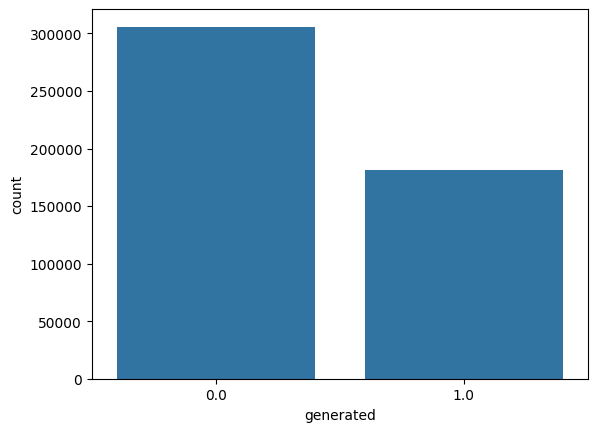

In [11]:
# distribution of categories in the 'generated' column of the DataFrame
sns.countplot(data=df,x='generated')

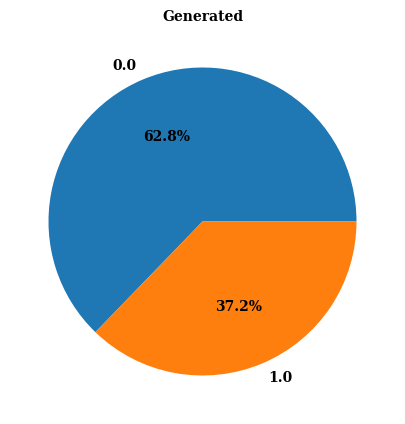

In [12]:
# percentage of categories in the 'generated' column of the DataFrame
plt.figure(figsize=(15,5))
plt.pie(df['generated'].value_counts(), labels=df['generated'].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 10,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Generated', size=10, **hfont)
plt.show()

In [13]:
#  counts of total texts, human-written texts, and AI-generated texts in the 'generated' column of the DataFrame
total_text_count = df['generated'].count()
human_written_txt_count = (df['generated'] == 0.0).sum()
ai_generated_txt_count = (df['generated'] == 1.0).sum()
print('Total Texts:', total_text_count)
print('Human Written Texts:', human_written_txt_count )
print('AI Generated Texts:', ai_generated_txt_count )


Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


In [14]:
#take a sample data from dataset
df_zeros = df[df['generated'] == 0].head(10000)
df_ones = df[df['generated'] == 1].head(10000)

In [15]:
new_df = pd.concat([df_zeros, df_ones], ignore_index=True)

In [16]:
df_new = new_df.copy()

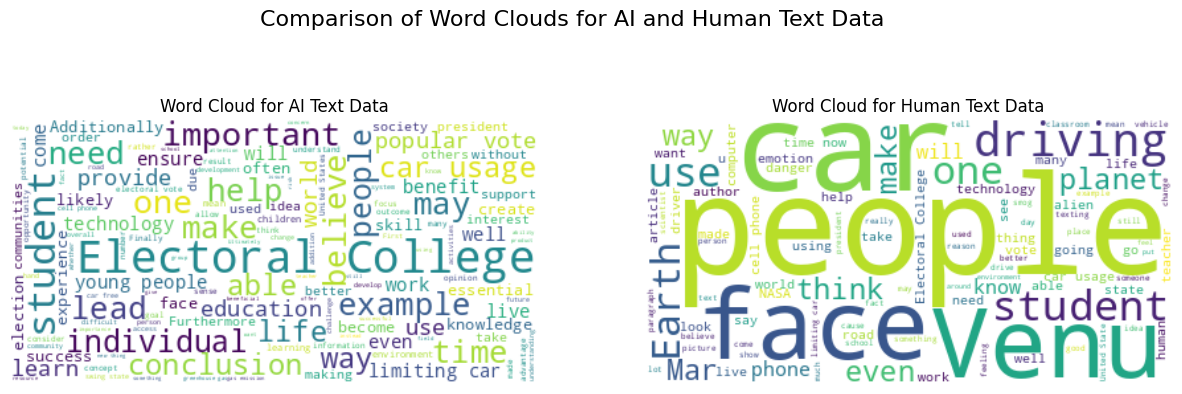

In [17]:
#Comparison of Word clouds for AI and Human text Data

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Separate data for AI-generated and human-generated text
ai_text_data = ' '.join(df_new[df_new['generated'] == 1]['text'])
human_text_data = ' '.join(df_new[df_new['generated'] == 0]['text'])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot Word Cloud for AI-generated text
if ai_text_data:
    wordcloud_ai = WordCloud(background_color='white').generate(ai_text_data)
    axs[0].imshow(wordcloud_ai, interpolation='bilinear')
    axs[0].axis('off')
    axs[0].set_title('Word Cloud for AI Text Data')

# Plot Word Cloud for human-generated text
if human_text_data:
    wordcloud_human = WordCloud(background_color='white').generate(human_text_data)
    axs[1].imshow(wordcloud_human, interpolation='bilinear')
    axs[1].axis('off')
    axs[1].set_title('Word Cloud for Human Text Data')

plt.suptitle('Comparison of Word Clouds for AI and Human Text Data', fontsize=16)
plt.show()


# **02. DATA CLEANING AND PERFORM PREPROCESSING**

In [18]:
#count of null value rows
num_null_rows = df.isnull().sum()
print("Number of Duplicate Rows:", num_null_rows)

Number of Duplicate Rows: text         0
generated    0
dtype: int64


In [19]:
# Count of duplicate rows
num_duplicate_rows = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicate_rows)


Number of Duplicate Rows: 0


# ***Remove List of tags  (newline characters and single quotes)***

In [20]:
# examining the text content of the first row in the 'text' column- human written text
df['text'][1]

'Transportation is a large necessity in most countries worldwide. With no doubt, cars, buses, and other means of transportation make going from place to place easier and faster. However there\'s always a negative pollution. Although mobile transportation are a huge part of daily lives, we are endangering the Earth with harmful greenhouse gases, which could be suppressed.\n\nA small suburb community in Germany called Vauban, has started a "carfree" lifestyle. In this city, markets and stores are placed nearby homes, instead of being located by farend highways. Although Vauban is not completely carfree, 70% of Vauban families do not own cars Even a large 57% of families stated to have sold their cars to move to Vauban. Some families have even said to be less stressed depending on car transportation. Cars are responsible for about 12% of greenhouse gases, and can even be up to 50% in some carintensive areas in the United States.\n\nAnother insight to reduced car zones brings Paris\' incid

In [21]:
# examining the text content of the last row in the 'text' column- AI generated text
df['text'][487234]

'Richard Non, Jimmy Carter, and Bob Dole and other companies have all agreed to abolish the Electoral College and I to agree Xor many reasons. One ox the major issue is that the voters don\'t know what really happens to their vote. Another issue to add is that \'\'the electoral collage is unfair, outdated, and irrational".\n\nDo the citizens that go and vote Xor their candidate actually choose Xor the candidate\'s electors? In the text is states that not only do I vote Xor candidate\'s electors but also \'\' help choose the state\'s electors when you vote Xor the president\'\'. This meaning that my vote counts Xor several things, but was I aware? Maybe not because I simply think I\'m voting Xor a candidate running Xor president not the candidate\'s elector. The Electoral College was meet Xor a compromise between Congress and Citizens not all these extra people.\n\n\'\'This year voters can expect another close election in which the popular vote winner could lose again\'\'. Certainly thi

In [22]:
df_1 = df.copy()  ## Create a copy of the original DataFrame

In [23]:
# Define a function to remove specific tags from text

def remove_tags(text):
    # List of tags to remove (newline characters and single quotes)
    tags_to_remove = ['\n', '\'']

    # Iterate through the tags and replace them with an empty string
    for tag in tags_to_remove:
        if tag == '\n':
            text = text.replace(tag, ' ')
        else:
            text = text.replace(tag, '')

    return text

# Apply the remove_tags function to the 'text' column of the DataFrame
# This line iterates over all rows in the 'text' column and removes the specified tags
df_1['text'] = df_1['text'].apply(remove_tags)


In [24]:
#verify the change applied
df_1['text'][1]

'Transportation is a large necessity in most countries worldwide. With no doubt, cars, buses, and other means of transportation make going from place to place easier and faster. However theres always a negative pollution. Although mobile transportation are a huge part of daily lives, we are endangering the Earth with harmful greenhouse gases, which could be suppressed.  A small suburb community in Germany called Vauban, has started a "carfree" lifestyle. In this city, markets and stores are placed nearby homes, instead of being located by farend highways. Although Vauban is not completely carfree, 70% of Vauban families do not own cars Even a large 57% of families stated to have sold their cars to move to Vauban. Some families have even said to be less stressed depending on car transportation. Cars are responsible for about 12% of greenhouse gases, and can even be up to 50% in some carintensive areas in the United States.  Another insight to reduced car zones brings Paris incident with

In [25]:
df_1['text'][487234]

'Richard Non, Jimmy Carter, and Bob Dole and other companies have all agreed to abolish the Electoral College and I to agree Xor many reasons. One ox the major issue is that the voters dont know what really happens to their vote. Another issue to add is that the electoral collage is unfair, outdated, and irrational".  Do the citizens that go and vote Xor their candidate actually choose Xor the candidates electors? In the text is states that not only do I vote Xor candidates electors but also  help choose the states electors when you vote Xor the president. This meaning that my vote counts Xor several things, but was I aware? Maybe not because I simply think Im voting Xor a candidate running Xor president not the candidates elector. The Electoral College was meet Xor a compromise between Congress and Citizens not all these extra people.  This year voters can expect another close election in which the popular vote winner could lose again. Certainly this doesnt make since because how coul

# ***Count of punctuation marks***

In [26]:
import string
from nltk.tokenize import word_tokenize

def count_punctuation_marks(text):
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    return punctuation_count

# Create new columns for punctuation and linking words count
df_1['punctuation_count'] = df_1['text'].apply(count_punctuation_marks)



***Visualize Comparison of punctuation count Distribution for AI-Generated and Human-Written Text***

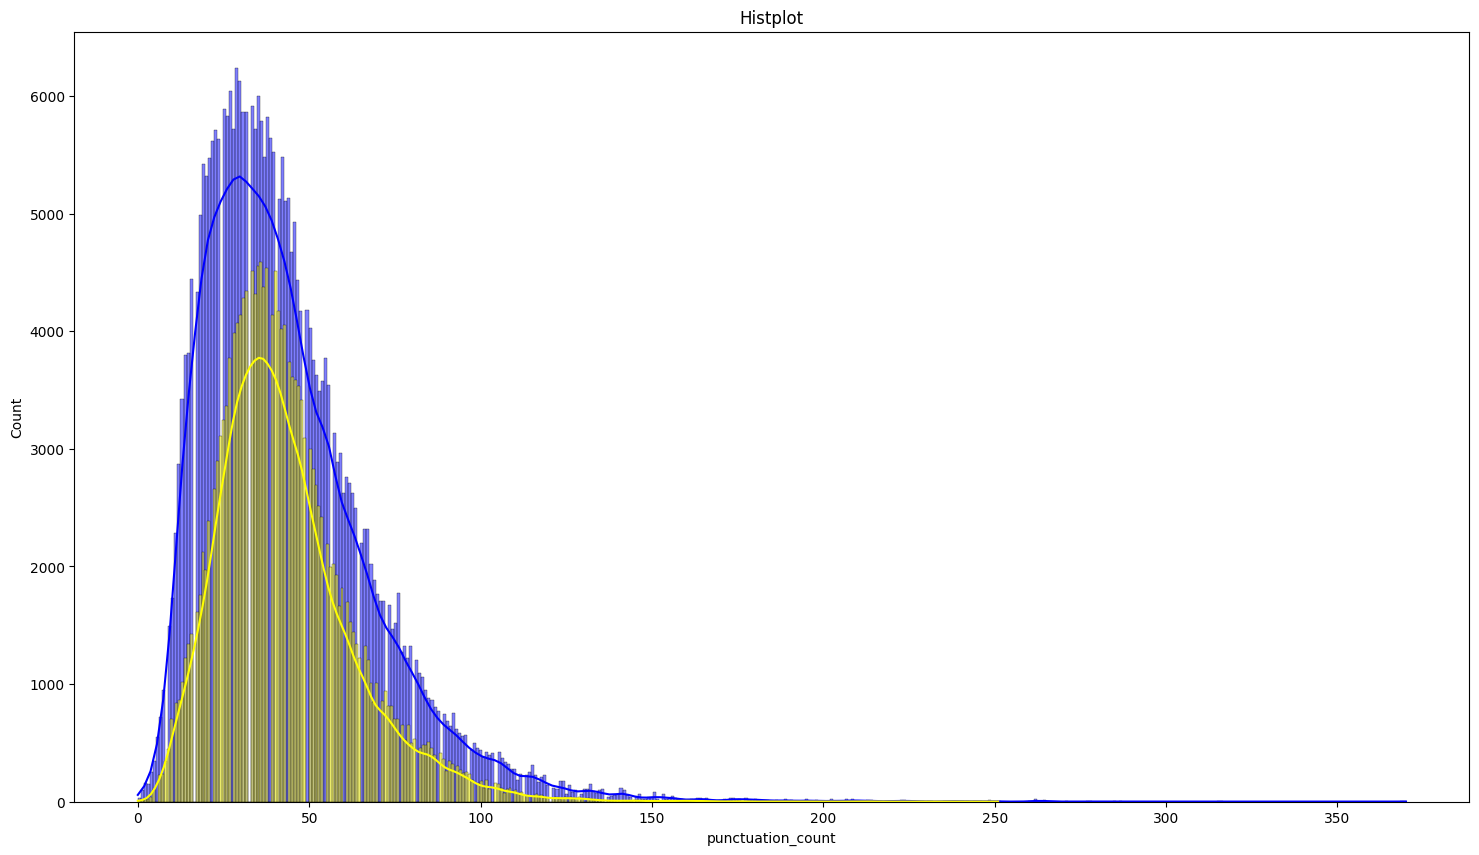

In [27]:
# Extracting data
human_txt_Punctuation_count = df_1[df_1['generated'] == 0]['punctuation_count']
ai_txt_Punctuation_count = df_1[df_1['generated'] == 1]['punctuation_count']

# Create plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plotting histplot for punctuation count distribution
sns.histplot(human_txt_Punctuation_count, kde=True, color='blue', label='Human', ax=ax)
sns.histplot(ai_txt_Punctuation_count, kde=True, color='yellow', label='AI', ax=ax)
ax.set_title('Histplot')

plt.show()


# ***Linking words count***

In [28]:
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

# Initialize Porter Stemmer and set of stopwords
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define additional linking words
additional_linking_words = {'to', 'the', 'and', 'of', 'in', 'on', 'for', 'with', 'at', 'a', 'an'}

# Combine stopwords and additional linking words
linking_words = stop_words.union(additional_linking_words)

def count_linking_words(text):
    # Tokenize the text and count the number of linking words
    linking_words_count = sum(1 for word in word_tokenize(text.lower()) if word in linking_words)
    return linking_words_count

df_1['linking_words_count'] = df_1['text'].apply(count_linking_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


***Visualize Comparison of linking words count Distribution for AI-Generated and Human-Written Text***

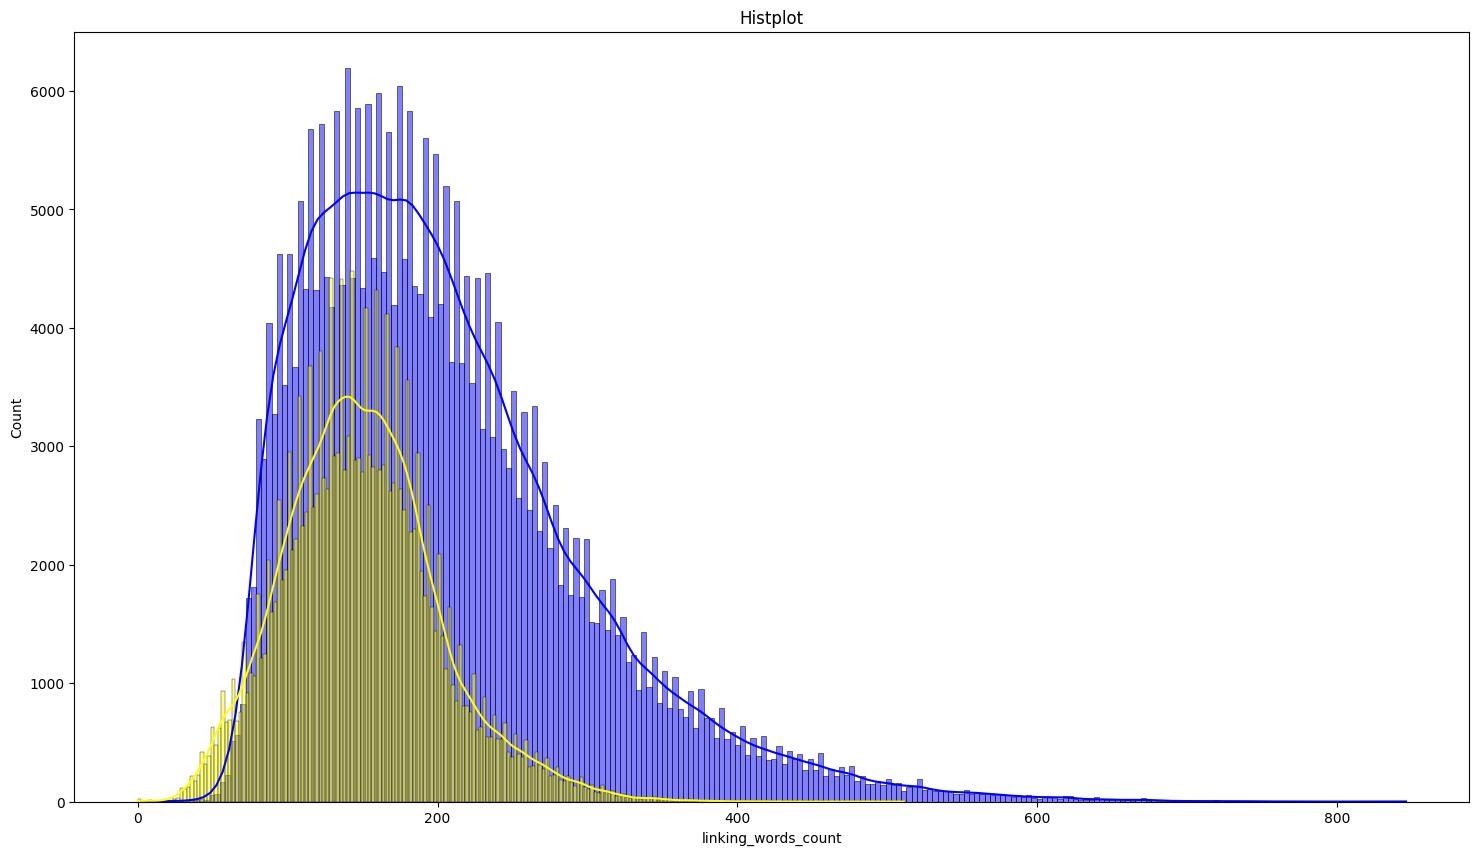

In [29]:
# Extracting data
human_txt_linking_words_count = df_1[df_1['generated'] == 0]['linking_words_count']
ai_txt_linking_words_count = df_1[df_1['generated'] == 1]['linking_words_count']

# Create plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plotting histplot for punctuation count distribution
sns.histplot(human_txt_linking_words_count, kde=True, color='blue', label='Human', ax=ax)
sns.histplot(ai_txt_linking_words_count, kde=True, color='yellow', label='AI', ax=ax)
ax.set_title('Histplot')

plt.show()


In [31]:
import pandas as pd
import pickle

# Saving the DataFrame to a pickle file
with open('df_1.pkl', 'wb') as f:
    pickle.dump(df_1, f)

In [33]:
# Loading the DataFrame from the pickle file
with open('df_1.pkl', 'rb') as f:
    df_1 = pickle.load(f)

# ***Finding percentage of punctuation in a text***

In [35]:
# Function to calculate percentage of punctuation in a text
def calculate_punctuation_count(text):
    text_length = len(word_tokenize(text))

    # Check if the text length is greater than 0 before performing the division
    if text_length > 0:
        return count_punctuation_marks(text) / text_length * 100
    else:
        return 0  # Set the percentage to 0 for texts with length 0

# Apply the function to create the 'punctuation_count_percentage' column
df_1['punctuation_count_percentage'] = df_1['text'].apply(calculate_punctuation_count)

***Visualize Comparison of linking words count Distribution for AI-Generated and Human-Written Text***

<ipython-input-36-74937a13882e>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='generated', y='punctuation_count_percentage', data=df_1, palette='muted', ci=None)
<ipython-input-36-74937a13882e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='generated', y='punctuation_count_percentage', data=df_1, palette='muted', ci=None)


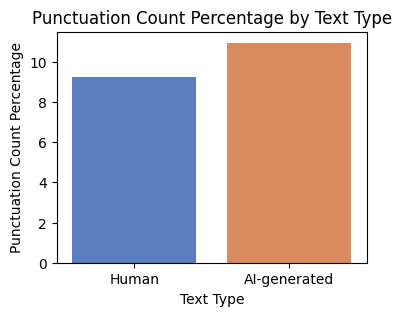

In [36]:
# Extracting data
human_txt_punctuation_count_percentage = df_1[df_1['generated'] == 0]['punctuation_count_percentage']
ai_txt_punctuation_count_percentage = df_1[df_1['generated'] == 1]['punctuation_count_percentage']

# Create a bar plot for punctuation count percentage distribution by text type
plt.figure(figsize=(4, 3))
sns.barplot(x='generated', y='punctuation_count_percentage', data=df_1, palette='muted', ci=None)
plt.title('Punctuation Count Percentage by Text Type')
plt.xlabel('Text Type')
plt.ylabel('Punctuation Count Percentage')
plt.xticks(ticks=[0, 1], labels=['Human', 'AI-generated'])
plt.show()


# ***Finding percentage of linking words in a text***

In [38]:
# Function to calculate percentage of linking words in a text
def calculate_linking_words_count(text):
    text_length = len(word_tokenize(text))

    # Check if the text length is greater than 0 before performing the division
    if text_length > 0:
        return count_linking_words(text) / text_length * 100
    else:
        return 0  # Set the percentage to 0 for texts with length 0

# Apply the function to create the 'linking_words_percentage' column
df_1['linking_words_percentage'] = df_1['text'].apply(calculate_linking_words_count)

<ipython-input-39-b5cb080f98eb>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='generated', y='linking_words_percentage', data=df_1, palette='muted', ci=None)
<ipython-input-39-b5cb080f98eb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='generated', y='linking_words_percentage', data=df_1, palette='muted', ci=None)


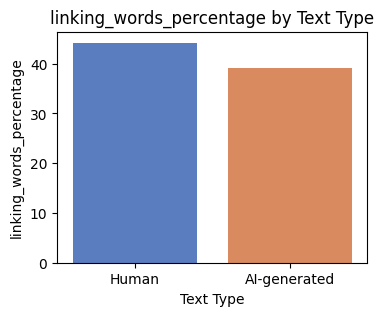

In [39]:
# Extracting data
human_txt_punctuation_count_percentage = df_1[df_1['generated'] == 0]['linking_words_percentage']
ai_txt_punctuation_count_percentage = df_1[df_1['generated'] == 1]['linking_words_percentage']

# Create a bar plot for punctuation count percentage distribution by text type
plt.figure(figsize=(4, 3))
sns.barplot(x='generated', y='linking_words_percentage', data=df_1, palette='muted', ci=None)
plt.title('linking_words_percentage by Text Type')
plt.xlabel('Text Type')
plt.ylabel('linking_words_percentage')
plt.xticks(ticks=[0, 1], labels=['Human', 'AI-generated'])
plt.show()

In [40]:
import pandas as pd
import pickle

# Saving the DataFrame to a pickle file
with open('df_2.pkl', 'wb') as f:
    pickle.dump(df_1, f)

In [41]:
# Loading the DataFrame from the pickle file
with open('df_2.pkl', 'rb') as f:
    df_1 = pickle.load(f)

# ***Take the word count***

In [43]:
from collections import Counter
from nltk.tokenize import word_tokenize
# df_2 = df_1.copy()
# # Function to tokenize text and remove stopwords
# def tokenize_text(text):
#     tokens = word_tokenize(text.lower())
#     stop_words = set(stopwords.words('english'))
#     return [token for token in tokens if token.isalpha() and token not in stop_words]

# Function to count word occurrences in each text
def count_word_occurrences(text):
    tokens = word_tokenize(text.lower())
    word_counts = Counter(tokens)
    return sum(word_counts.values())

# Create a new column 'word_count' for the total word count in each text
df_1['word_count'] = df_1['text'].apply(count_word_occurrences)

# ***Finding the length of each text***

In [44]:
from nltk.tokenize import word_tokenize

# Function to calculate text length
def lengthText(text):
    tokens = word_tokenize(text.lower())
    return len(tokens)

# Calculate text length for each text
df_1['length_text'] = df_1['text'].apply(lengthText)


# ***Comparison of Text Length Distribution for AI-Generated and Human-Written Text***

In [45]:
human_txt_lengths = df_1[df_1['generated'] == 0]['length_text']
ai_txt_lengths = df_1[df_1['generated'] == 1]['length_text']

<ipython-input-46-fbbea953f86c>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(human_txt_lengths, kde=True, color='blue', label='Human', ax=axes[1, 2])
<ipython-input-46-fbbea953f86c>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ai_txt_lengths, kde=True, color='orange', label='AI', ax=ax

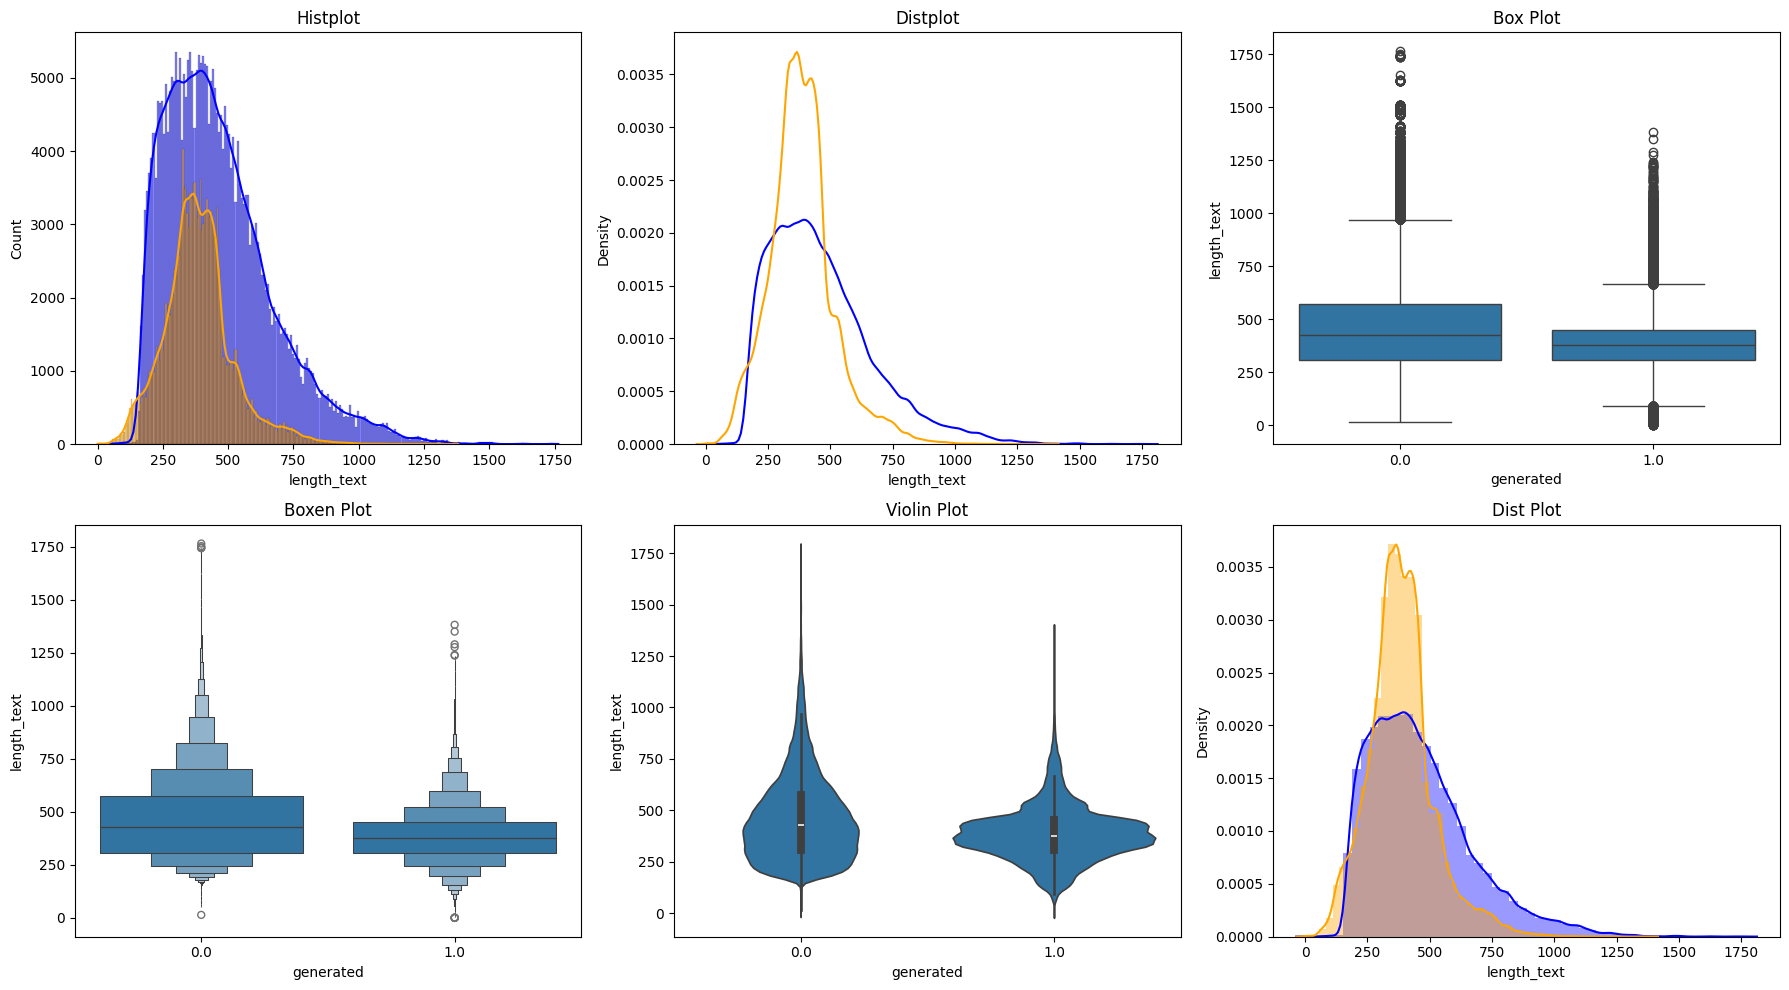

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

sns.histplot(human_txt_lengths, kde=True, color='blue', label='Human', ax=axes[0, 0])
sns.histplot(ai_txt_lengths, kde=True, color='orange', label='AI', ax=axes[0, 0])
axes[0, 0].set_title('Histplot')

sns.kdeplot(human_txt_lengths, color='blue', label='Human', ax=axes[0, 1])
sns.kdeplot(ai_txt_lengths, color='orange', label='AI', ax=axes[0, 1])
axes[0, 1].set_title('Distplot')

sns.boxplot(x='generated', y='length_text', data=df_1, ax=axes[0, 2])
axes[0, 2].set_title('Box Plot')

sns.boxenplot(x='generated', y='length_text', data=df_1, ax=axes[1, 0])
axes[1, 0].set_title('Boxen Plot')

sns.violinplot(x='generated', y='length_text', data=df_1, ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot')

sns.distplot(human_txt_lengths, kde=True, color='blue', label='Human', ax=axes[1, 2])
sns.distplot(ai_txt_lengths, kde=True, color='orange', label='AI', ax=axes[1, 2])
axes[1, 2].set_title('Dist Plot')

plt.tight_layout()
plt.show()

In [47]:
import pandas as pd
import pickle

# Saving the DataFrame to a pickle file
with open('df_3.pkl', 'wb') as f:
    pickle.dump(df_1, f)

In [48]:
# Loading the DataFrame from the pickle file
with open('df_3.pkl', 'rb') as f:
    df_1 = pickle.load(f)

# ***Spell Check***

In [49]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 30.7 MB/s eta 0:00:00


**'spelling_status' where 1 indicates correct spelling and 0 indicates incorrect spelling**

In [50]:
import nltk
from nltk.corpus import words

nltk.download('words')
english_words = set(words.words())

# Function to check if a word is spelled correctly
def is_spelled_correctly(word):
    return word in english_words

# Initialize a list for spelling status
spelling_status_list = []

# Loop through each row in the 'text' column
for word_to_check in df_1['text']:
    if is_spelled_correctly(word_to_check):
        spelling_status_list.append(1)  # 1 for correct
    else:
        spelling_status_list.append(0)  # 0 for incorrect

# Add a new column 'spelling_status' to the DataFrame
df_1['spelling_status'] = spelling_status_list

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [51]:
from spellchecker import SpellChecker

# Initialize spell checker
spell = SpellChecker()

# Function to check if a word is spelled correctly
def is_spelled_correctly(word):
    return word in spell

# Initialize a list for spelling status
spelling_status_list = []

# Loop through each row in the 'text' column
for word_to_check in df_1['text']:
    if is_spelled_correctly(word_to_check):
        spelling_status_list.append(1)  # 1 for correct
    else:
        spelling_status_list.append(0)  # 0 for incorrect

 # Add a new column 'spelling_status' to the DataFrame
df_1['spelling_status'] = spelling_status_list


In [52]:
# Counting occurrences of each spelling status for human-written text
human_txt_status_counts = df_1[df_1['generated'] == 0]['spelling_status'].value_counts()

# Counting occurrences of each spelling status for AI-generated text
ai_txt_status_counts = df_1[df_1['generated'] == 1]['spelling_status'].value_counts()

# Print the counts
print("Human-written text:")
print("Spelling status 0 (Incorrect):", human_txt_status_counts.get(0, 0))
print("Spelling status 1 (Correct):", human_txt_status_counts.get(1, 0))
print("\nAI-generated text:")
print("Spelling status 0 (Incorrect):", ai_txt_status_counts.get(0, 0))
print("Spelling status 1 (Correct):", ai_txt_status_counts.get(1, 0))


Human-written text:
Spelling status 0 (Incorrect): 305797
Spelling status 1 (Correct): 0

AI-generated text:
Spelling status 0 (Incorrect): 181438
Spelling status 1 (Correct): 0


In [53]:
df_1

,text,generated,punctuation_count,linking_words_count,punctuation_count_percentage,linking_words_percentage,word_count,length_text,spelling_status
0,Cars. Cars have been around since they became ...,0.0,72,261,10.992366,39.847328,654,654,0
1,Transportation is a large necessity in most co...,0.0,59,197,11.324376,37.811900,521,521,0
2,"""Americas love affair with its vehicles seems ...",0.0,93,331,11.137725,39.640719,835,835,0
3,How often do you ride in a car? Do you drive a...,0.0,112,310,14.123581,39.092055,793,793,0
4,Cars are a wonderful thing. They are perhaps o...,0.0,106,389,10.984456,40.310881,963,963,0
...,...,...,...,...,...,...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,14,91,6.796117,44.174757,206,206,0
487231,The whole purpose of democracy is to create a ...,0.0,45,189,10.514019,44.158879,428,428,0
487232,I firmly believe that governments worldwide sh...,1.0,56,136,13.429257,32.613909,417,417,0
487233,I DFNt agree with this decision because a LFT ...,0.0,16,137,4.481793,38.375350,357,357,0


In [54]:
# # Export to CSV with index included
df_1.to_csv('formatted_dataset.csv')

In [55]:
import pandas as pd
import pickle

# Saving the DataFrame to a pickle file
with open('df_4.pkl', 'wb') as f:
    pickle.dump(df_1, f)

In [56]:
# Loading the DataFrame from the pickle file
with open('df_4.pkl', 'rb') as f:
    df_1 = pickle.load(f)

# **Load Pickle file**

In [57]:
# # Load the processed data from the pickle file
# with open('processed_data_selected.pkl', 'rb') as f:
#     loaded_data = pickle.load(f)

# # Extract the DataFrame and other variables
# df_1_processed = loaded_data['df_1']
# total_text_count_loaded = loaded_data['total_text_count']
# human_written_txt_count_loaded = loaded_data['human_written_txt_count']
# ai_generated_txt_count_loaded = loaded_data['ai_generated_txt_count']

In [58]:
# df_1_processed

# **Start from here 🔽**
load the given pickle file after extract to files